In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from data.load_data import load_monk
from src.MetricFunctions import get_metric_instance
from src.MLP import MLP, RandomizedMLP
from src.GridSearch import GridSearch, print_grid_results
from sklearn.model_selection import train_test_split

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
path = os.getcwd()
file = '/data/ML-CUP22-TR.csv'

labels = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','y1','y2']

TR = pd.read_csv(path + file, sep = ',', header = None, usecols=range(1,12), \
                 names = labels, skiprows = 7)

TR = TR.to_numpy()

np.random.shuffle(TR)

TR = np.split(TR, [9], axis = 1)

X = TR[0]
y_true = TR[1]

X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size = 0.1, random_state = 42)


In [45]:
#rmlp = RandomizedMLP([100, 100], 9, 2,task = "regression", activation_function = "relu")

# params_grid = {

#     "step": [0.1, 0.3],
#     'alpha_l2' : [0.001, 0.0005, 0.0001, 0],
#     'alpha_l1' : [0.001, 0.0005, 0.0001, 0],
#     'weights_mean' : [0, 0.05, 0.1],
#     'weights_scale' : [0.2, 0.1, 0.05],
                       
    # "momentum": [0],               
    # 'Nesterov' : [False],
    # 'weights_initialization' : ['scaled'],      
    # 'regularization' : ['elastic'],
    # "batch_size": [-1],
    # 'n_epochs' : [3000],
    # 'tolerance' : [1e-4],
    # 'patience': [10],
    # 'early_stopping' : [True],
                  
# }

# grid_rand = GridSearch(rmlp)
# grid_rand.fit(X_train, y_train, params_grid, n_folds = 5, parallel = True)

print('Grid search of 288 combinations\n')

print('Parallelization activated \n')

print("Best parameters: {'step': 0.3, 'batch_size': -1, 'alpha_l2': 0.0001, 'alpha_l1': 0, 'weights_mean': 0, 'weights_scale': 0.1, 'momentum': 0, 'Nesterov': False, 'weights_initialization': 'scaled', 'regularization': 'elastic', 'n_epochs': 3000, 'tolerance': 1e-07, 'patience': 50}")

print("Best score: 1.7822121885436384")

Grid search of 288 combinations

Parallelization activated 

Best parameters: {'step': 0.3, 'batch_size': -1, 'alpha_l2': 0.0001, 'alpha_l1': 0, 'weights_mean': 0, 'weights_scale': 0.1, 'momentum': 0, 'Nesterov': False, 'weights_initialization': 'scaled', 'regularization': 'elastic', 'n_epochs': 3000, 'tolerance': 1e-07, 'patience': 50}
Best score: 1.7822121885436384


In [50]:
rmlp = RandomizedMLP([100, 100], 9, 2,task = "regression", activation_function = "relu")

par = {

    "step" : 0.3,
    'alpha_l2' : 0.0001,
    'alpha_l1' : 0,
    'weights_mean' : 0,
    'weights_scale' : 0.1,
                       
    "momentum": 0,               
    'Nesterov' : False,
    'weights_initialization' : 'scaled',      
    'regularization' : 'elastic',
    "batch_size": -1,
    'n_epochs' : 3000,
    'tolerance' : 1e-4,
    'patience': 10,
    'early_stopping' : True,
    'eval_metric' : 'mee'
}

rmlp.fit(X_train, y_train, **par)

print('Test MEE = ' + str(rmlp.score(X_test, y_test)))

print('Validation MEE = ', rmlp.validation_curve[1697])

print('Test MAE = ', rmlp.validation_curve[1697])

Early stopped training on epoch 1706
Best epoch was 1697


In [51]:
mee = get_metric_instance('MEE')

print('MEE on test set is: ', mee(y_test, rmlp.predict(X_test)))

MEE on test set is:  1.706679493400298


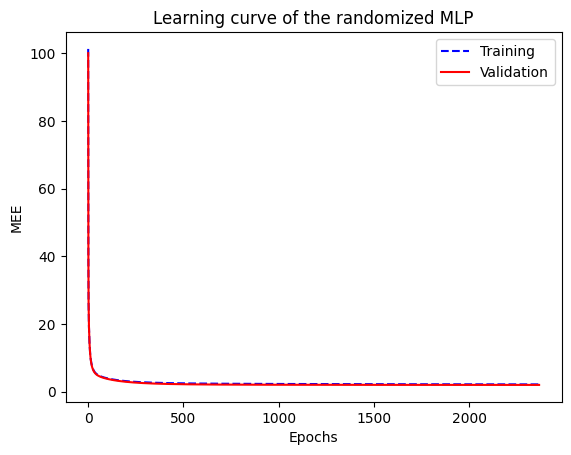

In [43]:
plt.title('Learning curve of the randomized MLP')

plt.plot(rmlp.learning_curve, label = 'Training', color = 'blue', linestyle = 'dashed')
plt.plot(rmlp.validation_curve, label = 'Validation', color = 'red')

plt.xlabel('Epochs')
plt.ylabel('MEE')
plt.legend()
plt.show()
plt.close()


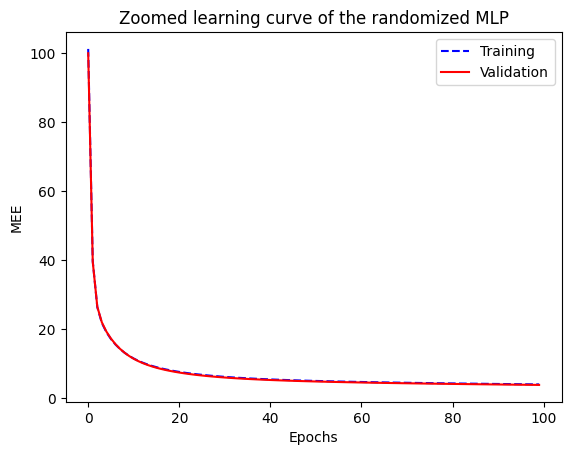

In [44]:
plt.title('Zoomed learning curve of the randomized MLP')

plt.plot(rmlp.learning_curve[:100], label = 'Training', color = 'blue', linestyle = 'dashed')
plt.plot(rmlp.validation_curve[:100], label = 'Validation', color = 'red')

plt.xlabel('Epochs')
plt.ylabel('MEE')
plt.legend()
plt.show()
plt.close()

In [46]:
rmlp.learning_curve[-1]


2.1672497133060546

In [47]:
rmlp.validation_curve[-1]

2.0098082584552373